#인공지능 색상 검출기

## 파이썬 환경설정

머신러닝에 필요한 라이브러리를 설치하는 과정(파이썬 라이브러리 및 텐서플로우 라이브러리)

In [1]:
# 환경 설정
%%capture

!apt-get -qq install xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

# CSV 파일 업로드

1. 왼쪽의 파일탭의 sample_data 디렉토리에 banana.csv, blueberries.csv, strawberries.csv

## CSV 파일의 데이터를 가져와 훈련이 가능한 데이터 형태로 변경


TensorFlow version = 2.8.0

banana class will be output 0 of the classifier
104 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



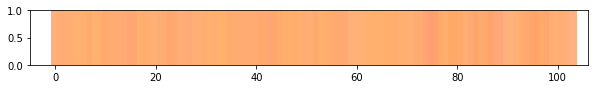

blueberries class will be output 1 of the classifier
119 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



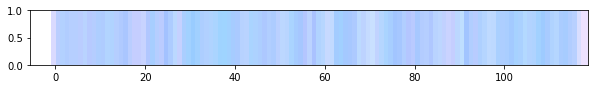

strawberries class will be output 2 of the classifier
110 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



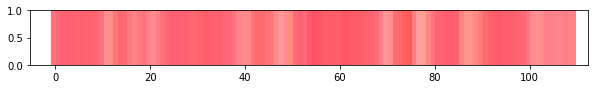

Data set parsing and preparation complete.
Data set randomization and splitting complete.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput

print(f"TensorFlow version = {tf.__version__}\n")

# 머신러닝에 필요한 난수를 생성하는 과정
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

# 학습에 필요한 CSV 파일을 가지고 오는 과정
for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

#python sort() 함수를 사용하여 CLASSES 내 데이터를 정렬
CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# 분류학습 결과를 출력하기 위한 one-hot 인코딩 배열 생성
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

inputs = []
outputs = []

# 학습에 필요한 csv파일을 읽어들여 학습을 위한 준비를 하는 과정
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)

  # 읽어들인 csv 파일 내에 포함된 빈칸을 제거하여 텐서플로우가 효율적으로 동작하고도록 함
  df = df.dropna()
  df = df.reset_index(drop=True)

  # csv파일로부터 읽어온 데이터 레코드의 갯수를 계산
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  #학습을 위한 그래프 생성
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()
  
  #텐서플로우 학습을 위한 텐서 생성
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# 리스트 형태를 가지는 inputs와 outputs를 배열의 형태로 변경
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

# 현재 보유한 데이터를 학습 데이터, 테스트데이터, 검증 데이터로 분류하는 과정
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# 학습이 잘되도록 하기 위해 데이터를 무작위로 섞는 과정
inputs = inputs[randomize]
outputs = outputs[randomize]

# 학습 데이터를 훈련 데이터, 테스트 데이터, 그리고 검증 데이터로 분류
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")


## 소스코드 빌드 및 학습 시작


In [3]:
# 학습 모델을 빌드하여 학습을 진행하는 과정
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=400, batch_size=4, validation_data=(inputs_validate, outputs_validate))



Epoch 1/400
50/50 [==============================] - 1s 7ms/step - loss: 0.2181 - mae: 0.4395 - val_loss: 0.2161 - val_mae: 0.4373
Epoch 2/400
50/50 [==============================] - 0s 3ms/step - loss: 0.2138 - mae: 0.4349 - val_loss: 0.2121 - val_mae: 0.4331
Epoch 3/400
50/50 [==============================] - 0s 3ms/step - loss: 0.2093 - mae: 0.4298 - val_loss: 0.2074 - val_mae: 0.4279
Epoch 4/400
50/50 [==============================] - 0s 3ms/step - loss: 0.2041 - mae: 0.4242 - val_loss: 0.2020 - val_mae: 0.4218
Epoch 5/400
50/50 [==============================] - 0s 3ms/step - loss: 0.1983 - mae: 0.4175 - val_loss: 0.1961 - val_mae: 0.4148
Epoch 6/400
50/50 [==============================] - 0s 3ms/step - loss: 0.1915 - mae: 0.4095 - val_loss: 0.1894 - val_mae: 0.4064
Epoch 7/400
50/50 [==============================] - 0s 3ms/step - loss: 0.1840 - mae: 0.3998 - val_loss: 0.1813 - val_mae: 0.3961
Epoch 8/400
50/50 [==============================] - 0s 3ms/step - loss: 0.1763 - m

### 테스트 코드 실행
테스트 코드를 실행하여 예측값 확인

predictions =
 [[0.993 0.    0.007]
 [0.007 0.    0.993]
 [0.    0.    1.   ]
 [0.004 0.    0.996]
 [0.    0.    1.   ]
 [0.997 0.001 0.003]
 [0.    0.    1.   ]
 [0.991 0.    0.009]
 [0.997 0.001 0.003]
 [0.    1.    0.   ]
 [0.996 0.    0.003]
 [0.    0.    1.   ]
 [0.001 0.999 0.   ]
 [0.996 0.    0.004]
 [0.997 0.001 0.003]
 [0.001 0.999 0.   ]
 [0.997 0.001 0.002]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.992 0.    0.008]
 [0.003 0.    0.997]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.993 0.    0.007]
 [0.989 0.    0.011]
 [0.    1.    0.   ]
 [0.997 0.002 0.002]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.992 0.    0.008]
 [0.    0.    1.   ]
 [0.077 0.    0.923]
 [0.997 0.001 0.003]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.994 0.    0.005]
 [0.    1.    0.   ]
 [0.993 0.    0.006]
 [0.    1.    0.   

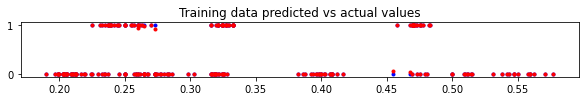

In [4]:
# 학습이 종료된 후 테스트 데이터를 통해 학습 결과를 확인
predictions = model.predict(inputs_test)

# 예측값과 실제값의 확인
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# 예측값과 실제값의 데이터를 시각화
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# 현재의 학습모델을 텐서플로우 Lite에서 사용가능한 모델로 변경

지금까지 텐서플로우를 통해 학습을 진행하였다. 이제 아두이노 33 BLE Sense에서 사용할 수 있도록 텐서플로우 Lite에서 활용할 수 있는 학습모델로 변경한다.

In [5]:
#텐서플로우 학습모델이 텐서플로우Lite에서 동작할 수 있도록 모델 변경
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 학습데이터를 파일로 생성
open("color_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("color_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /tmp/tmp3p43sea9/assets


Model is 2204 bytes


## 아두이노에서 활용가능한 학습 모델로 변경


In [6]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat color_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 13,626 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
